1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [154]:
class pca ():
    import numpy as np
    def __init__(self, ncomponents=None):
        self.ncomponents=ncomponents

    def fit(self, data):
        x_centered = data - np.mean(data, axis=0)
        cov = np.cov(x_centered)
        eig_vals, eig_vecs = np.linalg.eig(cov)

        # sort the eigenvalues and eigenvectors in descending order
        sorted_index = np.argsort(eig_vals)[::-1]
        self.eig_vals=eig_vals[sorted_index]
        self.eig_vecs=eig_vecs[:,sorted_index]

        # reduce the dimensionality of the system
        if self.ncomponents is not None:
            self.eig_vals = self.eig_vals[:self.ncomponents]
            self.eig_vecs = self.eig_vecs[:,:self.ncomponents]
    
    def transform (self, data):
        if data.shape[0] != self.eig_vecs.T.shape[1]:
            data=data.T
        x_centered = data - np.mean(data, axis=0)
        
        X_reduced = np.dot(self.eig_vecs.transpose(), x_centered)
        return X_reduced

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

    def spectrum (self):
        return self.eig_vals

    def eigen_vectors(self):
        return self.eig_vecs
    
    def explained_variance (self, component):
        return np.abs(self.eig_vals[component] / np.sum(self.eig_vals))

In [155]:
import numpy as np
# * Generate a dataset with 3 features each with N entries.
#  With normal distribution generate the 3 variables such that:
#     * $x_1$ is distributed as $N(0,1)$
#     * $x_2$ is distributed as $x_1+N(0,3)$
#     * $x_3$ is given by $2x_1+x_2$
N=1000
x_1 = np.random.normal(0, 1, N)
x_2 = x_1+np.random.normal(0, 3, N)
x_3 = np.dot(2,x_1) + x_2
x = np.array([x_1, x_2, x_3])
# * Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
cov = np.cov(x)
print('covariance matrix:')
print(cov)
eig_vals, eig_vecs = np.linalg.eig(cov)
# * Sort the eigenvalues and eigenvectors in descending order
eig_vals_sorted = np.sort(eig_vals)[::-1]
print('Eigenvalues: ', eig_vals)
print('Eigenvectors: ', eig_vecs)

covariance matrix:
[[ 1.09164115  0.97574463  3.15902693]
 [ 0.97574463 10.19441145 12.14590072]
 [ 3.15902693 12.14590072 18.46395458]]
Eigenvalues:  [2.75322688e+01 2.73959294e-16 2.21773836e+00]
Eigenvectors:  [[-0.11798586 -0.81649658  0.56516606]
 [-0.57419837 -0.40824829 -0.70966863]
 [-0.81017009  0.40824829  0.42066348]]


In [156]:
# * Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
u, s, vh = np.linalg.svd(x)
sorted_s = np.sort(s)[::-1]
print('Eigenvalues: ', s**2/(N-1))
print('Eigenvectors: \n', u)

Eigenvalues:  [2.75619911e+01 2.21957375e+00 6.96363401e-31]
Eigenvectors: 
 [[-0.11782105  0.56520044 -0.81649658]
 [-0.57440529 -0.70950116 -0.40824829]
 [-0.81004738  0.42089972  0.40824829]]


In [157]:
# What percent of the total dataset's variability is explained by the principal components? 
# Given how the dataset was constructed, do these make sense? Reduce the dimensionality of 
# the system so that at least 99% of the total variability is retained.
mypca = pca()
mypca.fit(x)
for i in range(x.shape[0]):
    print('Explained variance for component', i, ':', mypca.explained_variance(i))

Explained variance for component 0 : 0.785868790660027
Explained variance for component 1 : 0.21413120933997307
Explained variance for component 2 : 1.530281137741642e-17


This makes sense since the second and the third component are linear combination of the previous variable. Thus, the variance of the model is encoded only in the first component.

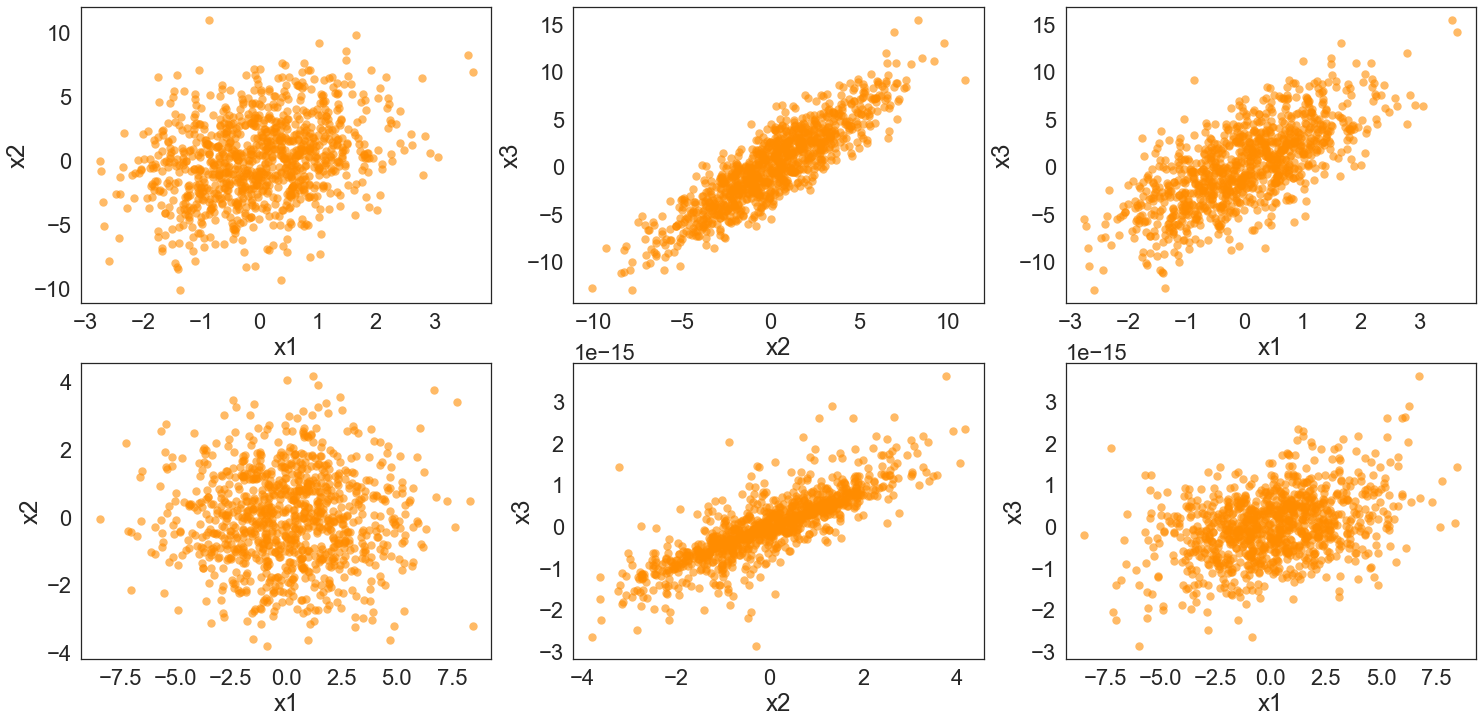

In [158]:
#  Redefine the data in the basis yielded by the PCA procedure
newdata = mypca.transform(x)

# Plot the data points in the original and the new coordiantes as a set of scatter plots.
# Your final figure should have 2 rows of 3 plots each, where the columns 
# show the (0,1), (0,2) and (1,2) proejctions.

fig,ax=plt.subplots(nrows=2 , ncols=3, figsize=(25,12))
sns.set_theme(style='white',palette='Dark2',font_scale=1.5)
c = 'darkorange'
s=70
for i in range(3):
    if i == 2:
        sns.scatterplot(x=x[0], y=x[2], ax=ax[0,i], color=c, alpha=0.6, linewidth=0, s=s)
        ax[0,i].set_xlabel('x1')
        ax[0,i].set_ylabel('x3')
    else:
        sns.scatterplot(x=x[i], y=x[i+1], ax=ax[0,i], color=c, alpha=0.6, linewidth=0, s=s)
        ax[0,i].set_xlabel('x'+str(i+1))
        ax[0,i].set_ylabel('x'+str(i+2))

for i in range(3):
    if i == 2:
        sns.scatterplot(x=newdata[0], y=newdata[2], ax=ax[1,i], color=c, alpha=0.6, linewidth=0, s=s)
        ax[1,i].set_xlabel(r'x1')
        ax[1,i].set_ylabel(r'x3')
    else:
        sns.scatterplot(x=newdata[i], y=newdata[i+1], ax=ax[1,i], color=c, alpha=0.6, linewidth=0, s=s)
        ax[1,i].set_xlabel(r'x'+str(i+1))
        ax[1,i].set_ylabel(r'x'+str(i+2))

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [159]:
noisyvar = [np.random.normal(0, i/50, N) for i in range(3,13)]
noisyvar = np.array(noisyvar)
newdataset = np.concatenate([x.T, noisyvar.T], axis=1).T

In [160]:
mypca.fit(newdataset)
tranformed_newdata=mypca.transform(newdataset)

In [161]:
for i in range(tranformed_newdata.shape[0]):
    print('Explained variance for component', i, ':', mypca.explained_variance(i))

Explained variance for component 0 : 0.9034895631731722
Explained variance for component 1 : 0.08752372703644173
Explained variance for component 2 : 0.0022622314020714304
Explained variance for component 3 : 0.001639141467212804
Explained variance for component 4 : 0.001487219617151819
Explained variance for component 5 : 0.001064661485140997
Explained variance for component 6 : 0.0008814353171600388
Explained variance for component 7 : 0.0006754814507991294
Explained variance for component 8 : 0.0004661500500773709
Explained variance for component 9 : 0.0003115082387603992
Explained variance for component 10 : 0.00017008965061091318
Explained variance for component 11 : 2.8791111401164222e-05
Explained variance for component 12 : 6.868378415045137e-17


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


          x         y         z
0  0.764842 -0.001522  0.000528
1  0.748411 -0.000251  0.000250
2  0.731508  0.001700 -0.001616
3  0.714142 -0.000600  0.000813
4  0.696326  0.002369 -0.001128


(-0.01, 0.01)

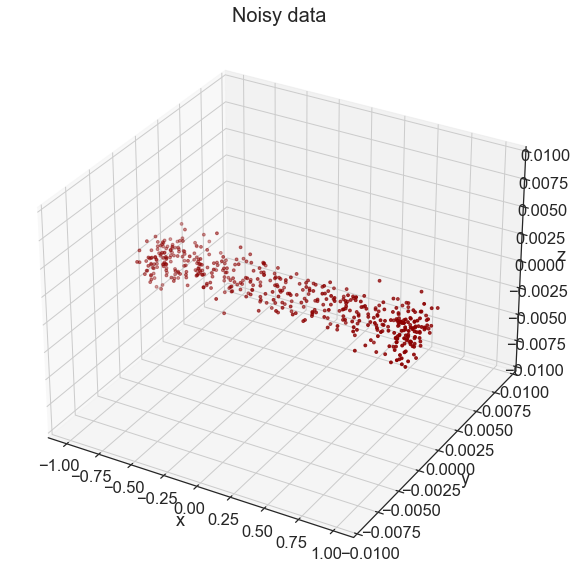

In [162]:

# Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's 
# motion along the x axis, assuming a little random noise affects the measurements 
# along the $y$. Rotate such dataset to emulate the records of each camera.
N=500
omega = 2
sigma = 1e-3
phi=0.7
t = np.arange(0,2*np.pi,2*np.pi/N)
x = np.cos(omega*t+phi)
y = np.random.normal(0, sigma, N)
z = np.random.normal(0, sigma, N)
osc = np.array([x, y, z])


import pandas as pd
oscdf = pd.DataFrame(osc.T, columns=['x', 'y', 'z'])
print(oscdf.head())

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c='darkred', marker='o', s=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Noisy data', fontsize=20)
lim = [-0.01,0.01]
ax.set_ylim(lim)
ax.set_zlim(lim)


Text(0.5, 1.0, 'PCA COMPONENTS')

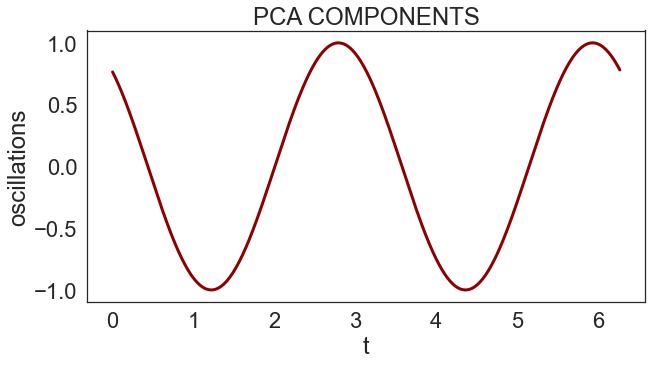

In [163]:
#sklearn PCA
from sklearn.decomposition import PCA
remove_noise = PCA(n_components=1)
osc_clean=remove_noise.fit_transform(oscdf).flatten()

import seaborn as sns
sns.set_theme(style='white',palette='Dark2',font_scale=2)
fig, ax = plt.subplots(figsize=(10,5), facecolor='white')
sns.lineplot(x=t, y=osc_clean, color='darkred', ax=ax, lw=3)
ax.set_xlabel('t')
ax.set_ylabel('oscillations')
ax.set_title('PCA COMPONENTS')


In [164]:
newdata=pca(ncomponents=1).fit_transform(osc)


Text(0.5, 1.0, 'PCA COMPONENTS')

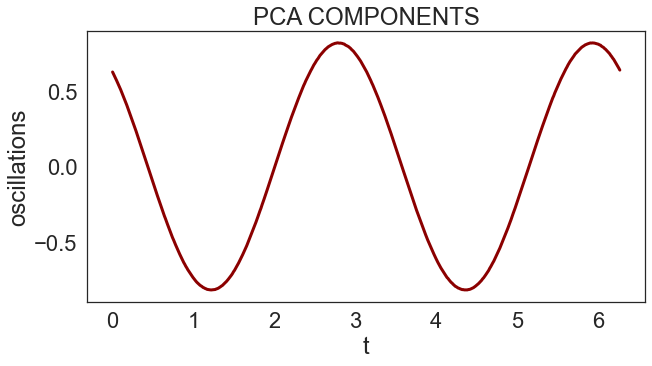

In [165]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='white')
sns.lineplot(x=t, y=newdata[0], color='darkred', ax=ax, lw=3)
ax.set_xlabel('t')
ax.set_ylabel('oscillations')
ax.set_title('PCA COMPONENTS')

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2021-12-13 12:08:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘/Users/nicolez/data/magic04.data.7’

magic04.data.7      100%[===================>]   1.41M   326KB/s    in 4.8s    

2021-12-13 12:09:02 (299 KB/s) - ‘/Users/nicolez/data/magic04.data.7’ saved [1477391/1477391]

--2021-12-13 12:09:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: ‘/Users/nicolez/data/magic04.names.7’

magic04.nam